# Practicum Project : Peformance Trend Classification

Problem Statement : To analyze a performance trend and classify the trend as Degraded / Improved / Neutral.
Data: 30 Days Call Peformance Data was collected for thousands of Wireless Nodes. Using Python Code Images with 1 Line chart (Call Drop%) and 2 line charts(Call Drop% and Call Drops) were generated and manually Classified into three categories- Degraded , Improved , Neutral.

The Train, Validation and Test data was generated. CNN model were trained on train data, Validated on Validation data and accuracy was tested on Test data.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/data-reclassification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/data-reclassification/Data_0206/Data/Validate/Neutral/CZAEHZZZZ.png
../input/data-reclassification/Data_0206/Data/Validate/Neutral/CZAFFZZ.png
../input/data-reclassification/Data_0206/Data/Validate/Neutral/CCZGAGZZZ.png
../input/data-reclassification/Data_0206/Data/Validate/Neutral/CCZFHEZZZ.png
../input/data-reclassification/Data_0206/Data/Validate/Neutral/FCAZEFABA.png
../input/data-reclassification/Data_0206/Data/Validate/Neutral/CCZFACZZZ.png
../input/data-reclassification/Data_0206/Data/Validate/Neutral/CCZAFDZ.png
../input/data-reclassification/Data_0206/Data/Validate/Neutral/CZEEHZZZZ.png
../input/data-reclassification/Data_0206/Data/Validate/Neutral/CEICCFZ.png
../input/data-reclassification/Data_0206/Data/Validate/Neutral/CZAFCZZ.png
../input/data-reclassification/Data_0206/Data/Validate/Neutral/CZAEEZZ.png
../input/data-reclassification/Data_0206/Data/Validate/Neutral/CCZEFGZZZ.png
../input/data-reclassification/Data_0206/Data/Validate/Neutral/CZAGHZZ.png
../input/da

# Importing all the needed libraries.

In [2]:
import tensorflow as tf

from tensorflow.keras import backend, models, layers, regularizers , optimizers

from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.layers import BatchNormalization , Concatenate

from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout ,Input

from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.metrics import categorical_crossentropy

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing import image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import InceptionV3

from tensorflow.keras.utils import plot_model

from tensorflow.keras import backend

import matplotlib.image as mpimg

import matplotlib.pyplot as plt

%matplotlib inline

import random

import os

import numpy as np

import pandas as pd

# Project Part 1

The part 1 of the project is to train a CNN Model for classifying images with one feature into Degraded , Improved and Neutral category.

In [3]:
train_directory ='../input/data-reclassification/Data_0206/Data/Train'
val_directory = '../input/data-reclassification/Data_0206/Data/Validate'
test_directory = '../input/data-reclassification/Data_0206/Data/Test'

In [4]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_directory, # The directory where the train data is located
    target_size=(224, 224), # Reshape the image to 224 by 224 pixels. This is important because it makes sure all images are the same size.
    batch_size=32, # We will take images in batches of 32.
    color_mode='rgb',
    class_mode='sparse') # The classification is not binary.

validation_generator = val_datagen.flow_from_directory(
    val_directory,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='sparse')

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='sparse')

Found 820 images belonging to 3 classes.
Found 819 images belonging to 3 classes.
Found 822 images belonging to 3 classes.


In [6]:
train_generator.class_indices

{'Degraded': 0, 'Improved': 1, 'Neutral': 2}

In [7]:
num_classes=(len(train_generator.class_indices))
print(num_classes)

3


# Model 1

Sequential API : Model built with 4 Conv2D layers and Max pooling .Dropout was used to address overfitting.

In [8]:
backend.clear_session()
model_base = models.Sequential()
model_base.add(layers.Conv2D(512, (3,3), activation = 'relu', input_shape = (224, 224, 3)))
model_base.add(layers.MaxPool2D((2,2)))
model_base.add(layers.Dropout(0.5))
model_base.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model_base.add(layers.Dropout(0.5))
model_base.add(layers.MaxPool2D((2,2)))
model_base.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model_base.add(layers.Dropout(0.5))
model_base.add(layers.MaxPool2D((2,2)))
model_base.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model_base.add(layers.Dropout(0.5))
model_base.add(layers.MaxPool2D((2,2)))
model_base.add(layers.Flatten())
model_base.add(layers.Dense(128, activation='relu'))
model_base.add(layers.Dropout(0.5))
model_base.add(layers.Dense(3, activation='softmax'))

model_base.summary()

model_base.compile(optimizer =optimizers.Adam(lr=0.001),
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

history = model_base.fit_generator(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=20,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights= True)])

test_loss, test_acc = model_base.evaluate_generator(test_generator, steps = 20)
print('test_acc:', test_acc)

2022-03-05 08:33:47.092081: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-05 08:33:47.230587: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-05 08:33:47.231340: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-05 08:33:47.232560: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 512)     14336     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 512)     0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 512)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 256)     1179904   
_________________________________________________________________
dropout_1 (Dropout)          (None, 109, 109, 256)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 256)       5

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-03-05 08:33:49.846961: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-03-05 08:33:51.399046: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


26/26 [==============================] - 22s 509ms/step - loss: 2.9690 - accuracy: 0.6134 - val_loss: 1.0333 - val_accuracy: 0.6781
Epoch 2/50
26/26 [==============================] - 10s 385ms/step - loss: 0.8970 - accuracy: 0.6768 - val_loss: 1.0111 - val_accuracy: 0.6766
Epoch 3/50
26/26 [==============================] - 10s 375ms/step - loss: 0.8806 - accuracy: 0.6768 - val_loss: 1.0169 - val_accuracy: 0.6641
Epoch 4/50
26/26 [==============================] - 10s 376ms/step - loss: 0.8843 - accuracy: 0.6768 - val_loss: 0.9745 - val_accuracy: 0.6781
Epoch 5/50
26/26 [==============================] - 10s 372ms/step - loss: 0.8759 - accuracy: 0.6768 - val_loss: 0.9740 - val_accuracy: 0.6719
Epoch 6/50
26/26 [==============================] - 10s 375ms/step - loss: 0.8574 - accuracy: 0.6768 - val_loss: 0.9555 - val_accuracy: 0.6656


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test_acc: 0.6703125238418579


# Model-2 Functional API


In [9]:
backend.clear_session()
visible = Input(shape=(224,224,3))
#Create Tower1
conv_1_1 = Conv2D(64, (1,1), padding= 'same' , activation= 'relu', strides=2)(visible)
#Create Tower2
conv_1_2 = Conv2D(64, (1,1), padding= 'same' , activation = 'relu')(visible)
conv_2_2 = Conv2D(64, (3,3), padding= 'same' , activation= 'relu', strides=2)(conv_1_2)
#Create Tower3
conv_1_3 = AveragePooling2D((3,3), padding= 'same', strides=2)(visible)
conv_2_3 = Conv2D(64, (3,3), padding= 'same' , activation= 'relu')(conv_1_3)
#Create Tower4
conv_1_4 = Conv2D(64, (1,1), padding= 'same' , activation = 'relu')(visible)
conv_2_4 = Conv2D(64, (3,3), padding= 'same' , activation = 'relu')(conv_1_4)
conv_3_4 = Conv2D(64, (3,3), padding= 'same' , activation = 'relu', strides=2)(conv_2_4)

# Concatentate
merge = Concatenate(axis=-1)([conv_1_1, conv_2_2, conv_2_3, conv_3_4])

# Flatten into fully connected layer
flat = Flatten()(merge)

# Hidden connected layer and output
hidden = Dense(32, activation='relu')(flat)
drop = Dropout(0.5)(hidden)
output = Dense(3, activation='softmax')(drop)

model_funcapi= Model(inputs=visible, outputs=output)


model_funcapi.compile(optimizer = optimizers.Adam(lr=0.001),
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

history = model_funcapi.fit_generator(
          train_generator,
          epochs=50,
          validation_data=validation_generator,
          validation_steps=20,
          verbose=1, 
          callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True)])

test_loss , test_acc = model_funcapi.evaluate_generator(test_generator , steps = 20)

print('Using Functional API and Adam Optimizer the accuracy is ---', test_acc)

Epoch 1/50
26/26 [==============================] - 10s 332ms/step - loss: 20.0076 - accuracy: 0.6220 - val_loss: 1.0890 - val_accuracy: 0.6687
Epoch 2/50
26/26 [==============================] - 7s 286ms/step - loss: 1.9366 - accuracy: 0.6768 - val_loss: 1.0734 - val_accuracy: 0.6766
Epoch 3/50
26/26 [==============================] - 8s 291ms/step - loss: 1.0663 - accuracy: 0.6768 - val_loss: 1.0602 - val_accuracy: 0.6656
Epoch 4/50
26/26 [==============================] - 7s 287ms/step - loss: 1.0518 - accuracy: 0.6768 - val_loss: 1.0430 - val_accuracy: 0.6828
Epoch 5/50
26/26 [==============================] - 8s 298ms/step - loss: 1.0376 - accuracy: 0.6768 - val_loss: 1.0302 - val_accuracy: 0.6766
Epoch 6/50
26/26 [==============================] - 7s 288ms/step - loss: 1.0240 - accuracy: 0.6768 - val_loss: 1.0172 - val_accuracy: 0.6766
Epoch 7/50
26/26 [==============================] - 8s 294ms/step - loss: 1.0113 - accuracy: 0.6768 - val_loss: 1.0086 - val_accuracy: 0.6641
Epoc

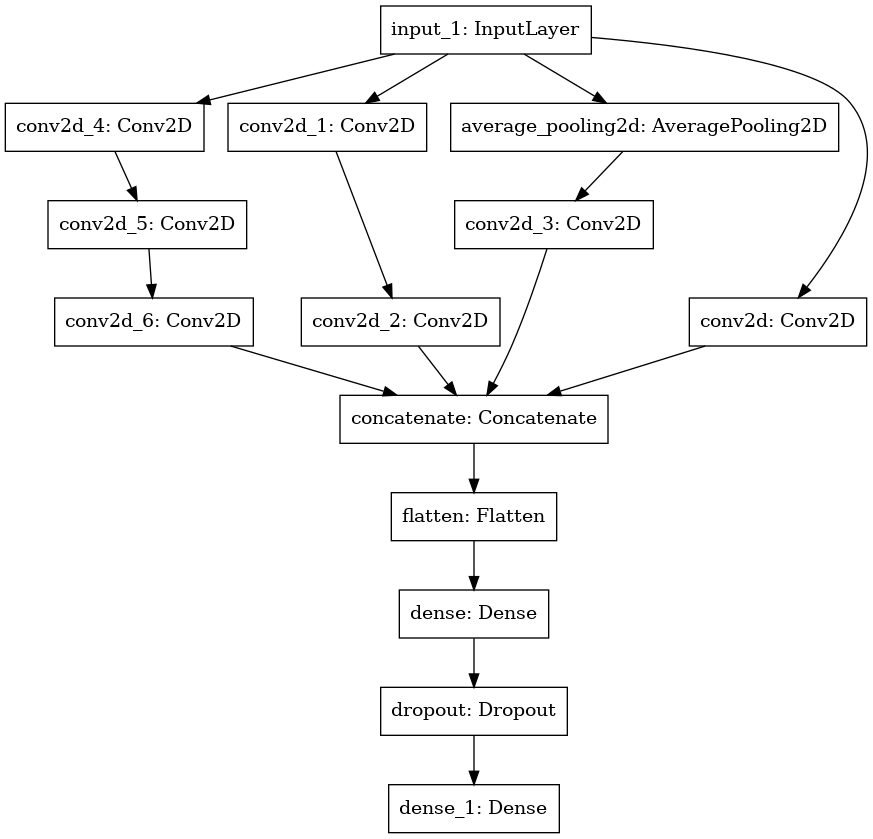

In [10]:
plot_model(model_funcapi)

# Model-3 Transfer Learning. Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem

InceptionV3 Model was used to perform multiclass classification. 

Inception is a convolutional neural network architecture introduced by Google which achieved top results in ImageNet Large Scale Visual Recognition Challenge 2014.


87924736/87910968 [==============================] - 0s 0us/step


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
20/20 [==============================] - 11s 348ms/step - loss: 14.0059 - accuracy: 0.7150 - val_loss: 30.3290 - val_accuracy: 0.5141
Epoch 2/50
20/20 [==============================] - 5s 247ms/step - loss: 7.6917 - accuracy: 0.8201 - val_loss: 16.3102 - val_accuracy: 0.6109
Epoch 3/50
20/20 [==============================] - 6s 284ms/step - loss: 2.6230 - accuracy: 0.9140 - val_loss: 10.3794 - val_accuracy: 0.7734
Epoch 4/50
20/20 [==============================] - 5s 251ms/step - loss: 2.9535 - accuracy: 0.9141 - val_loss: 9.7932 - val_accuracy: 0.7328
Epoch 5/50
20/20 [==============================] - 5s 259ms/step - loss: 2.8852 - accuracy: 0.9268 - val_loss: 22.3255 - val_accuracy: 0.6000
Epoch 6/50
20/20 [==============================] - 5s 246ms/step - loss: 2.0130 - accuracy: 0.9379 - val_loss: 9.6213 - val_accuracy: 0.7406
Epoch 7/50
20/20 [==============================] - 5s 246ms/step - loss: 1.3793 - accuracy: 0.9506 - val_loss: 10.6753 - val_accuracy: 0.7703

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


InceptionV3 Model and using RMSprop optimizer accuracy is ---- 0.7984374761581421


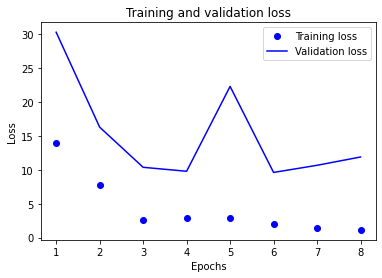

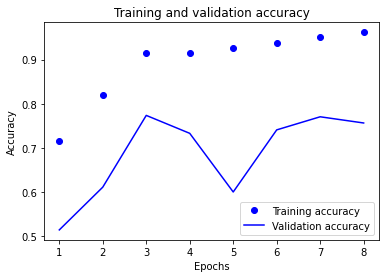

In [11]:
backend.clear_session()
conv_base = InceptionV3 (weights = 'imagenet', 
                  include_top = False,
                  input_shape = (224, 224, 3))
conv_base.trainable = False # Freeze the Inception V3 weights.

model = models.Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer = optimizers.RMSprop(lr=0.001, decay=1e-6, momentum=0.9),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
history = model.fit_generator(
          train_generator,
          steps_per_epoch=20,
          epochs=50,
          validation_data=validation_generator,
          validation_steps=20,
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True)])

test_loss , test_acc = model.evaluate_generator(test_generator , steps = 20)

print('InceptionV3 Model and using RMSprop optimizer accuracy is ----', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model-4 Transfer Learning : Very Deep Convolutional Networks for Large-Scale Image Recognition(VGG-16)

VGG16 is a convolutional neural network trained on 1.2 million images to classify 1000 different categories was used to see if higher accuracy can be achieved.


In [12]:
backend.clear_session()
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(), loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

vgghist = model.fit_generator(
          train_generator,
          steps_per_epoch=20,
          epochs=50,
          validation_data=validation_generator,
          validation_steps=20,
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True)])
test_loss , test_acc = model.evaluate_generator(test_generator , steps = 20)

print('Accuracy using VGG16 and using RMSprop optimizer accuracy is ----', test_acc)

58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/50
20/20 [==============================] - 10s 391ms/step - loss: 6.2526 - accuracy: 0.5701 - val_loss: 1.7306 - val_accuracy: 0.7312
Epoch 2/50
20/20 [==============================] - 5s 236ms/step - loss: 1.6628 - accuracy: 0.6608 - val_loss: 1.0329 - val_accuracy: 0.6422
Epoch 3/50
20/20 [==============================] - 5s 249ms/step - loss: 0.7959 - accuracy: 0.7532 - val_loss: 0.4987 - val_accuracy: 0.8203
Epoch 4/50
20/20 [==============================] - 5s 241ms/step - loss: 0.7768 - accuracy: 0.7389 - val_loss: 0.5576 - val_accuracy: 0.7766
Epoch 5/50
20/20 [==============================] - 5s 253ms/step - loss: 0.7147 - accuracy: 0.7580 - val_loss: 1.4134 - val_accuracy: 0.7078
Epoch 6/50
20/20 [==============================] - 5s 252ms/step - loss: 0.5572 - accuracy: 0.7866 - val_loss: 0.4461 - val_accuracy: 0.8109
Epoch 7/50
20/20 [==============================] - 5s 249ms/step - loss: 0.5458 -

# Model-4 was tuned by changing the optimizer from RMSprop to Adam. 

In [13]:
backend.clear_session()
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = optimizers.Adam(lr=0.001), loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

vgghist = model.fit_generator(
          train_generator,
          steps_per_epoch=20,
          epochs=50,
          validation_data=validation_generator,
          validation_steps=20,
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True)])
test_loss , test_acc = model.evaluate_generator(test_generator , steps = 20)
print('Accuracy using VGG16 and using Adam optimizer accuracy is ----', test_acc)

Epoch 1/50
20/20 [==============================] - 6s 254ms/step - loss: 1.9083 - accuracy: 0.6438 - val_loss: 0.6235 - val_accuracy: 0.7469
Epoch 2/50
20/20 [==============================] - 6s 281ms/step - loss: 0.4521 - accuracy: 0.8232 - val_loss: 0.3798 - val_accuracy: 0.8203
Epoch 3/50
20/20 [==============================] - 5s 255ms/step - loss: 0.3799 - accuracy: 0.8424 - val_loss: 0.3943 - val_accuracy: 0.8219
Epoch 4/50
20/20 [==============================] - 5s 243ms/step - loss: 0.3480 - accuracy: 0.8551 - val_loss: 0.4603 - val_accuracy: 0.7969
Epoch 5/50
20/20 [==============================] - 5s 235ms/step - loss: 0.3346 - accuracy: 0.8583 - val_loss: 0.3738 - val_accuracy: 0.8281
Epoch 6/50
20/20 [==============================] - 5s 253ms/step - loss: 0.2860 - accuracy: 0.8828 - val_loss: 0.3823 - val_accuracy: 0.8297
Epoch 7/50
20/20 [==============================] - 5s 245ms/step - loss: 0.2564 - accuracy: 0.9156 - val_loss: 0.3792 - val_accuracy: 0.8266
Epoch 

# Project Part 2

For second part of the project, Images with 2 line charts(Call Drop% and Call Drops) were generated. 

.The Images were manually classified into Improved/Degraded/Neutral Category. Train, Validationa and Test Data was generated to train the below Models and accuracy was tested on the Test data.

In [14]:
train_directory2d ='../input/data-2d/Data_2d/Train_2d'
val_directory2d = '../input/data-2d/Data_2d/Validate_2d'
test_directory2d = '../input/data-2d/Data_2d/Test_2d'

In [15]:
train_datagen2d=ImageDataGenerator(rescale=1/255)
val_datagen2d=ImageDataGenerator(rescale=1/255)
test_datagen2d=ImageDataGenerator(rescale=1/255)

In [16]:
train_generator2d = train_datagen2d.flow_from_directory(
    train_directory2d, # The directory where the train data is located
    target_size=(224, 224), # Reshape the image to 224 by 224 pixels. This is important because it makes sure all images are the same size.
    batch_size=32, # We will take images in batches of 32.
    color_mode='rgb',
    class_mode='sparse') # The classification is not binary.

validation_generator2d = val_datagen2d.flow_from_directory(
    val_directory2d,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='sparse')

test_generator2d = test_datagen2d.flow_from_directory(
    test_directory2d,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='sparse')

Found 850 images belonging to 3 classes.
Found 850 images belonging to 3 classes.
Found 847 images belonging to 3 classes.


# Sequential Model

In [17]:
backend.clear_session()
model_base2d = models.Sequential()
model_base2d.add(layers.Conv2D(512, (3,3), activation = 'relu', input_shape = (224, 224, 3)))
model_base2d.add(layers.MaxPool2D((2,2)))
model_base2d.add(layers.Dropout(0.3))
model_base2d.add(layers.Conv2D(512, (3,3), activation = 'relu'))
model_base2d.add(layers.MaxPool2D((2,2)))
model_base2d.add(layers.Dropout(0.3))
model_base2d.add(layers.Conv2D(512, (3,3), activation = 'relu'))
model_base2d.add(layers.MaxPool2D((2,2)))
model_base2d.add(layers.Dropout(0.3))
model_base2d.add(layers.Conv2D(512, (3,3), activation = 'relu'))
model_base2d.add(layers.MaxPool2D((2,2)))
model_base2d.add(layers.Dropout(0.3))
model_base2d.add(layers.Flatten())
model_base2d.add(layers.Dense(128, activation='relu'))
model_base2d.add(layers.Dropout(0.5))
model_base2d.add(layers.Dense(3, activation='softmax'))

model_base2d.compile(optimizer =optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics = ['accuracy'])

history = model_base2d.fit_generator(
    train_generator2d,
    epochs=50,
    validation_data=validation_generator2d,
    validation_steps=20,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights= True)])

test_loss, test_acc = model_base2d.evaluate_generator(test_generator2d, steps = 20)
print('test_acc:', test_acc)

Epoch 1/50
27/27 [==============================] - 28s 834ms/step - loss: 3.4737 - accuracy: 0.5518 - val_loss: 1.0452 - val_accuracy: 0.5641
Epoch 2/50
27/27 [==============================] - 14s 523ms/step - loss: 1.0127 - accuracy: 0.5671 - val_loss: 1.0149 - val_accuracy: 0.5734
Epoch 3/50
27/27 [==============================] - 14s 511ms/step - loss: 0.9932 - accuracy: 0.5671 - val_loss: 0.9807 - val_accuracy: 0.5719
Epoch 4/50
27/27 [==============================] - 14s 506ms/step - loss: 0.9893 - accuracy: 0.5671 - val_loss: 0.9726 - val_accuracy: 0.5797
Epoch 5/50
27/27 [==============================] - 14s 504ms/step - loss: 1.0009 - accuracy: 0.5671 - val_loss: 0.9808 - val_accuracy: 0.5703
Epoch 6/50
27/27 [==============================] - 14s 511ms/step - loss: 0.9947 - accuracy: 0.5671 - val_loss: 0.9902 - val_accuracy: 0.5688
Epoch 7/50
27/27 [==============================] - 14s 505ms/step - loss: 0.9995 - accuracy: 0.5671 - val_loss: 0.9674 - val_accuracy: 0.5938

# Transfer learning VGG-16

VGG-16 gave the best accuracy for classifying the images with one feature so it was tried for classifying the images with 2 features.

In [18]:
backend.clear_session()
from tensorflow.keras.applications.vgg16 import VGG16

base_model2d = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

for layer in base_model2d.layers:
    layer.trainable = False
    
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model2d.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(base_model2d.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(), loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

vgghist2d = model.fit_generator(
          train_generator2d,
          steps_per_epoch=20,
          epochs=50,
          validation_data=validation_generator2d,
          validation_steps=20,
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True)])
test_loss , test_acc = model.evaluate_generator(test_generator2d , steps = 20)

print('Accuracy using VGG16 and using RMSprop optimizer accuracy is ----', test_acc)

Epoch 1/50
20/20 [==============================] - 7s 345ms/step - loss: 6.9090 - accuracy: 0.5479 - val_loss: 0.9345 - val_accuracy: 0.6641
Epoch 2/50
20/20 [==============================] - 5s 241ms/step - loss: 1.4137 - accuracy: 0.6547 - val_loss: 0.7312 - val_accuracy: 0.6938
Epoch 3/50
20/20 [==============================] - 5s 270ms/step - loss: 1.0570 - accuracy: 0.6953 - val_loss: 2.0813 - val_accuracy: 0.5281
Epoch 4/50
20/20 [==============================] - 5s 248ms/step - loss: 0.7062 - accuracy: 0.7297 - val_loss: 0.5311 - val_accuracy: 0.7656
Epoch 5/50
20/20 [==============================] - 5s 263ms/step - loss: 0.5627 - accuracy: 0.7668 - val_loss: 0.6568 - val_accuracy: 0.7281
Epoch 6/50
20/20 [==============================] - 5s 260ms/step - loss: 0.7751 - accuracy: 0.7268 - val_loss: 0.4611 - val_accuracy: 0.8234
Epoch 7/50
20/20 [==============================] - 5s 246ms/step - loss: 0.6786 - accuracy: 0.7172 - val_loss: 0.6472 - val_accuracy: 0.7047
Epoch 

# Conclusion

The VGG16 model gave 86.5% accuracy for first part of the projct. The accuracy achieved on the second part of the project was low compared to the first part.

Further efforts to be put in to improved the accuracy of second part of the project. 

First part of the project seems to have reasonable accuracy with VGG16 to be deployed to start classifying the peformance trend.